<a href="https://colab.research.google.com/github/SahaniDiss/my-project/blob/master/216028D_BigDataAnalysis_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install pyspark
!pip install pyspark

# Import required libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, countDistinct, isnan, when, count, mean, stddev, min, max

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Telco Churn Analysis") \
    .getOrCreate()


In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Loading the Dataset

In [ ]:
import pandas as pd

# Example: Load the files
main = pd.read_csv("/content/drive/MyDrive/BigData Dataset/main.csv")
train = pd.read_csv("/content/drive/MyDrive/BigData Dataset/train_cxid.csv")
test  = pd.read_csv("/content/drive/MyDrive/BigData Dataset/test_cxid.csv")

# Check
print(main.head())


                                         customer_id  \
0  e9126f469646506b8e82b4214d075bf72d9d324d357650...   
1  e9126f469646506b8e82b4214d075bf72d9d324d357650...   
2  e9126f469646506b8e82b4214d075bf72d9d324d357650...   
3  e9126f469646506b8e82b4214d075bf72d9d324d357650...   
4  e9126f469646506b8e82b4214d075bf72d9d324d357650...   

                 usage_type  Day_1   Day_2   Day_3   Day_4   Day_5   Day_6  \
0           usage_app_other  53.00  130.73    7.86   67.71  153.38   35.92   
1   usage_app_youtube_daily  98.50    0.00  284.82  150.05    0.00  261.89   
2  usage_app_facebook_daily  79.42   72.61   72.15   82.82   61.06   57.91   
3    usage_app_tiktok_daily  53.22   65.80   52.87   59.78   50.75   52.37   
4  usage_app_whatsapp_daily   0.00    4.18   20.33    7.89   18.37    7.17   

    Day_7  Day_8  ...  Day_81  Day_82  Day_83  Day_84  Day_85  Day_86  Day_87  \
0  128.60  30.61  ...     0.0     0.0     0.0     0.0    0.00     0.0     0.0   
1   44.89   0.00  ...     0.0   

# **Exploratory Data Analysis**

#### 1.Dataset Overview

In [ ]:
# Shape and basic info
print("Main shape:", main.shape)
print("\n--- Info ---")
print(main.info())

# First few rows
main.head()


Main shape: (780060, 92)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780060 entries, 0 to 780059
Data columns (total 92 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  780060 non-null  object 
 1   usage_type   780060 non-null  object 
 2   Day_1        780060 non-null  float64
 3   Day_2        780060 non-null  float64
 4   Day_3        780060 non-null  float64
 5   Day_4        780060 non-null  float64
 6   Day_5        780060 non-null  float64
 7   Day_6        780060 non-null  float64
 8   Day_7        780060 non-null  float64
 9   Day_8        780060 non-null  float64
 10  Day_9        780060 non-null  float64
 11  Day_10       780060 non-null  float64
 12  Day_11       780060 non-null  float64
 13  Day_12       780060 non-null  float64
 14  Day_13       780060 non-null  float64
 15  Day_14       780060 non-null  float64
 16  Day_15       780060 non-null  float64
 17  Day_16       780060 non-null

,customer_id,usage_type,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,...,Day_81,Day_82,Day_83,Day_84,Day_85,Day_86,Day_87,Day_88,Day_89,Day_90
0,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_app_other,53.00,130.73,7.86,67.71,153.38,35.92,128.60,30.61,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
1,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_app_youtube_daily,98.50,0.00,284.82,150.05,0.00,261.89,44.89,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,50.28,0.0
2,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_app_facebook_daily,79.42,72.61,72.15,82.82,61.06,57.91,55.59,56.46,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
3,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_app_tiktok_daily,53.22,65.80,52.87,59.78,50.75,52.37,44.12,40.88,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
4,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_app_whatsapp_daily,0.00,4.18,20.33,7.89,18.37,7.17,5.22,12.77,...,0.0,0.0,0.0,0.0,2.31,0.0,0.0,0.0,1.22,0.0


#### 2.Missing Values

In [ ]:
# Missing values summary
print("\n--- Missing Values ---")
print(main.isnull().sum())

# Percentage of missing values
missing_percent = (main.isnull().sum() / len(main)) * 100
print("\n--- Missing Values (%) ---")
print(missing_percent[missing_percent > 0])



--- Missing Values ---
customer_id    0
usage_type     0
Day_1          0
Day_2          0
Day_3          0
              ..
Day_86         0
Day_87         0
Day_88         0
Day_89         0
Day_90         0
Length: 92, dtype: int64

--- Missing Values (%) ---
Series([], dtype: float64)


#### 3. Summary Statistics

In [ ]:
# Summary of numeric columns
print("\n--- Summary Statistics (Numerical) ---")
print(main.describe())

# Summary of categorical columns
print("\n--- Summary Statistics (Categorical) ---")
print(main.describe(include=["object"]))



--- Summary Statistics (Numerical) ---
               Day_1          Day_2          Day_3          Day_4  \
count  780060.000000  780060.000000  780060.000000  780060.000000   
mean       59.059329      58.572838      58.099232      56.733478   
std        92.161761      92.171844      92.286972      91.719547   
min         0.000000       0.000000       0.000000       0.000000   
25%        11.200000      10.740000      10.640000      10.010000   
50%        22.330000      22.140000      22.180000      22.270000   
75%        82.110000      81.520000      81.360000      80.110000   
max      2063.400000    2390.200000    2161.970000    2017.910000   

               Day_5          Day_6          Day_7          Day_8  \
count  780060.000000  780060.000000  780060.000000  780060.000000   
mean       57.195418      54.254409      54.287894      53.169613   
std        92.259395      91.267128      91.123559      92.034067   
min         0.000000       0.000000       0.000000       0.000

#### Re-structuring the dataset for the purpose of analysis.

In [ ]:
import pandas as pd

# --- Step 1: Define categories ---
apps_cols = [
    "usage_app_youtube_daily", "usage_app_facebook_daily",
    "usage_app_tiktok_daily", "usage_app_whatsapp_daily",
    "usage_app_helakuru_daily", "usage_app_other"
]

calls_cols = [
    "usage_voice_d2d_outgoing", "usage_voice_d2nd_outgoing",
    "usage_voice_d2d_incoming", "usage_voice_nd2d_incoming"
]

spend_cols = [
    "usage_pack_data", "usage_pack_vas"
]

# --- Step 2: Reshape data into wide format (pivot) ---
# Right now each row is (customer_id, usage_type, day1..day90)
# So we pivot it to have one row per customer & usage_type
pivoted = main.melt(
    id_vars=["customer_id", "usage_type"],
    var_name="day",
    value_name="value"
)

# --- Step 3: Aggregate by customer & category ---
pivoted["category"] = pivoted["usage_type"].apply(
    lambda x: "apps" if x in apps_cols
    else "calls" if x in calls_cols
    else "spend" if x in spend_cols
    else "other"
)

# Sum usage over all days (Day_1 … Day_90)
agg_data = pivoted.groupby(["customer_id", "category"])["value"].sum().reset_index()

# --- Step 4: Pivot back to wide format (3 columns per customer) ---
final_df = agg_data.pivot(index="customer_id", columns="category", values="value").fillna(0).reset_index()

# Rename columns for clarity
final_df = final_df.rename(columns={
    "apps": "total_app_usage_MB",
    "calls": "total_call_usage_min",
    "spend": "total_spend_LKR"
})

# --- Check result ---
print(final_df.head())


category                                        customer_id  \
0         0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...   
1         0001702d0abcdbeeb23f7c434aa6858030f365caf1464a...   
2         0001ae52a920c36edc7ab364ea58a58ca725f0ad44c02b...   
3         000205e54ddf8bc7512490895ce397647faaedc114f411...   
4         0002511664bff302e40b19ed6872ad4390ac59901e55e2...   

category  total_app_usage_MB  total_call_usage_min  total_spend_LKR  
0                   69662.23               6789.26          8143.30  
1                   26345.52               6340.88          4020.33  
2                   45872.71               5305.77         19378.85  
3                   65223.75              11530.50         13108.79  
4                   39955.58               8212.28          5021.10  


In [ ]:
#Basic overview
print(final_df.shape)  # rows, columns
print(final_df.head())
print(final_df.info())

#Descriptive statistics
print("\nSummary Statistics:")
print(final_df[['total_app_usage_MB', 'total_call_usage_min', 'total_spend_LKR']].describe())



(65005, 4)
category                                        customer_id  \
0         0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...   
1         0001702d0abcdbeeb23f7c434aa6858030f365caf1464a...   
2         0001ae52a920c36edc7ab364ea58a58ca725f0ad44c02b...   
3         000205e54ddf8bc7512490895ce397647faaedc114f411...   
4         0002511664bff302e40b19ed6872ad4390ac59901e55e2...   

category  total_app_usage_MB  total_call_usage_min  total_spend_LKR  
0                   69662.23               6789.26          8143.30  
1                   26345.52               6340.88          4020.33  
2                   45872.71               5305.77         19378.85  
3                   65223.75              11530.50         13108.79  
4                   39955.58               8212.28          5021.10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65005 entries, 0 to 65004
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                ----

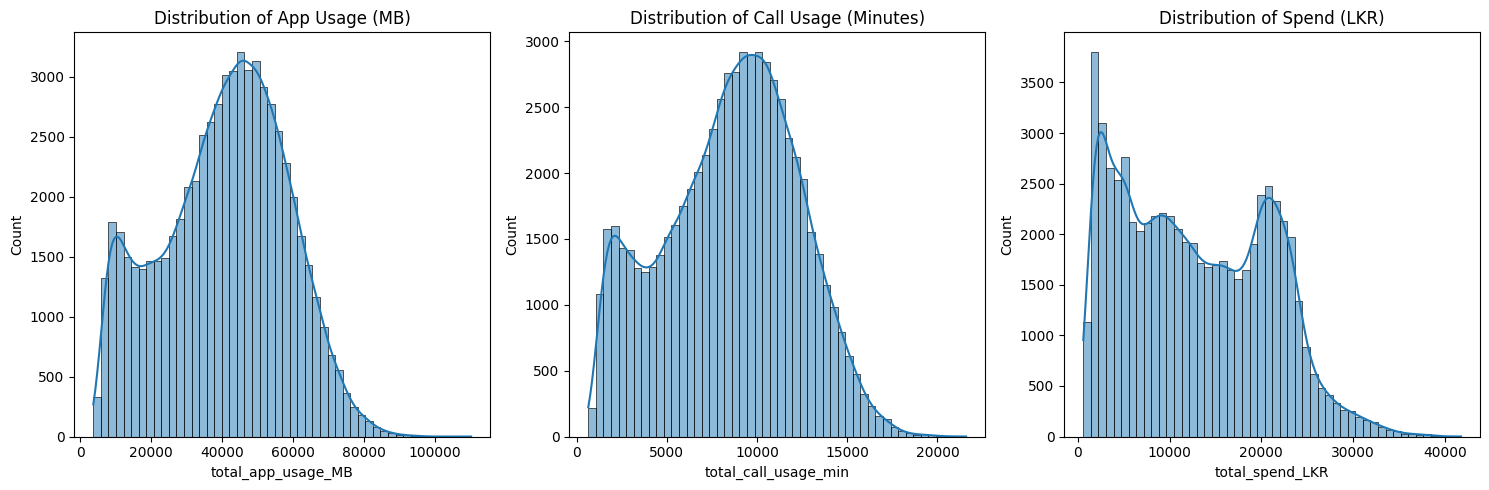

In [ ]:
#Distribution plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(final_df['total_app_usage_MB'], bins=50, kde=True)
plt.title("Distribution of App Usage (MB)")

plt.subplot(1,3,2)
sns.histplot(final_df['total_call_usage_min'], bins=50, kde=True)
plt.title("Distribution of Call Usage (Minutes)")

plt.subplot(1,3,3)
sns.histplot(final_df['total_spend_LKR'], bins=50, kde=True)
plt.title("Distribution of Spend (LKR)")

plt.tight_layout()
plt.show()

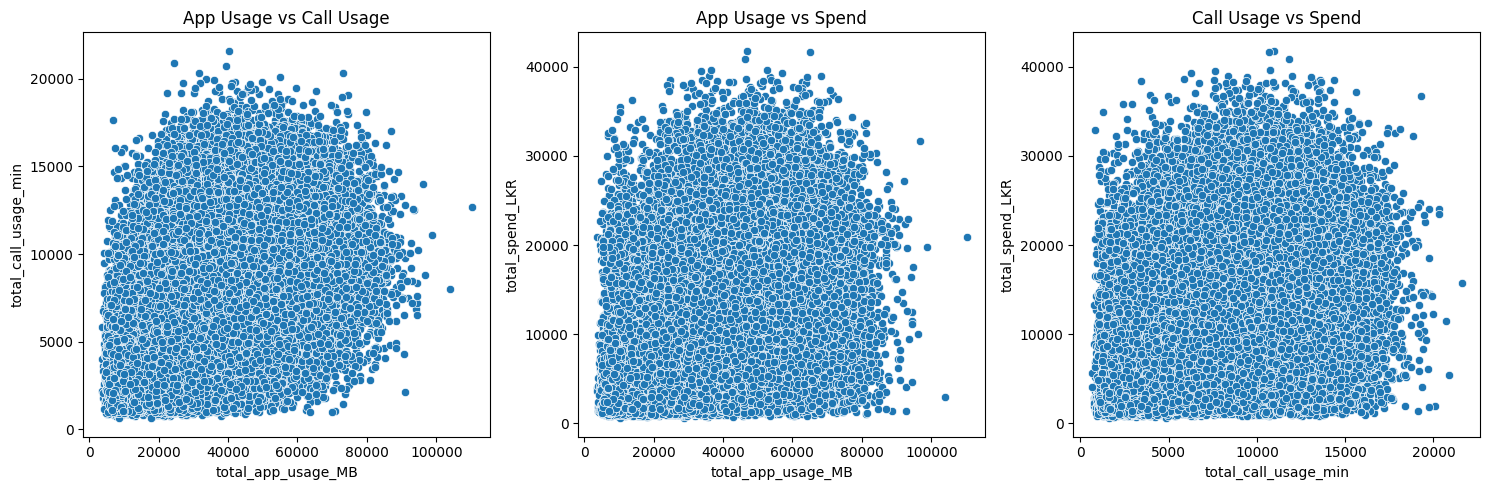

In [ ]:
#Relationship Plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='total_app_usage_MB', y='total_call_usage_min', data=final_df)
plt.title('App Usage vs Call Usage')

plt.subplot(1, 3, 2)
sns.scatterplot(x='total_app_usage_MB', y='total_spend_LKR', data=final_df)
plt.title('App Usage vs Spend')

plt.subplot(1, 3, 3)
sns.scatterplot(x='total_call_usage_min', y='total_spend_LKR', data=final_df)
plt.title('Call Usage vs Spend')

plt.tight_layout()
plt.show()

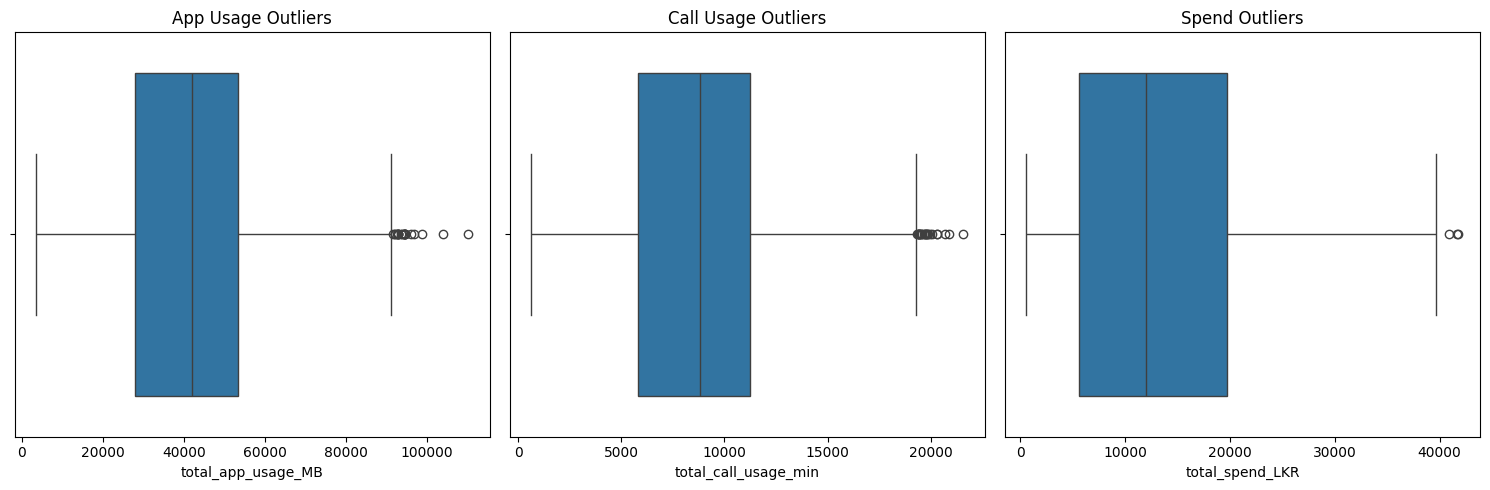

In [ ]:
# Boxplots (outliers detection)
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x=final_df['total_app_usage_MB'])
plt.title("App Usage Outliers")

plt.subplot(1,3,2)
sns.boxplot(x=final_df['total_call_usage_min'])
plt.title("Call Usage Outliers")

plt.subplot(1,3,3)
sns.boxplot(x=final_df['total_spend_LKR'])
plt.title("Spend Outliers")

plt.tight_layout()
plt.show()

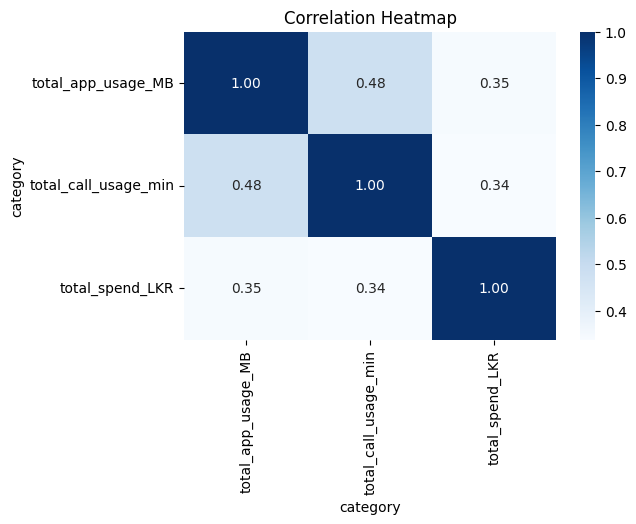

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(final_df[['total_app_usage_MB','total_call_usage_min','total_spend_LKR']].corr(),
            annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()